Identifying Texture Differences in Images Using ROIs and GLCMs

ROIs:

ROIs allow you to zoom in on specific areas for more detailed analysis. In texture analysis, selecting representative ROIs from both the foreground (e.g., leaves) and background (e.g., sky) is crucial for capturing the distinct textures we want to compare.Leveraging Gray Level Co-occurrence Matrix (GLCM):GLCM is a powerful tool for understanding the spatial relationships between pixels in an image. It tells us how often a pixel with a particular gray level "co-occurs" (appears next to) another pixel with a different or the same gray level, at a specific distance and direction (angle).

 By analyzing these co-occurrences, GLCM provides a quantitative measure of texture for each ROI.Extracting Meaningful Texture Features:Two common features extracted from GLCMs are:

 •Dissimilarity:This measures the contrast or local variation in the image. Higher dissimilarity indicates a rougher texture, while lower values suggest a smoother texture.

 •Correlation:This measures the linear dependence between neighboring pixels. Values closer to +1 or -1 indicate strong positive or negative correlation, suggesting a more directional or repetitive texture. Values closer to 0 suggest a more random texture.

 Visualizing the Differences:

 By plotting the dissimilarity on the x-axis and correlation on the y-axis, we can create a scatter plot. This plot helps us visually analyze the texture differences between the foreground and background ROIs.

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(-0.5, 511.5, 383.5, -0.5)

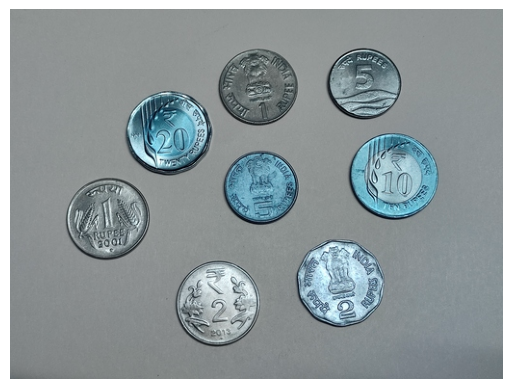

In [ ]:
img = cv2.imread("/content/coin.jpg")
plt.imshow(img)
plt.axis("off")

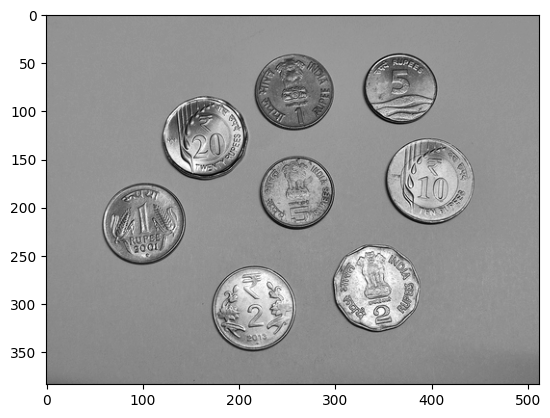

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap ='gray')

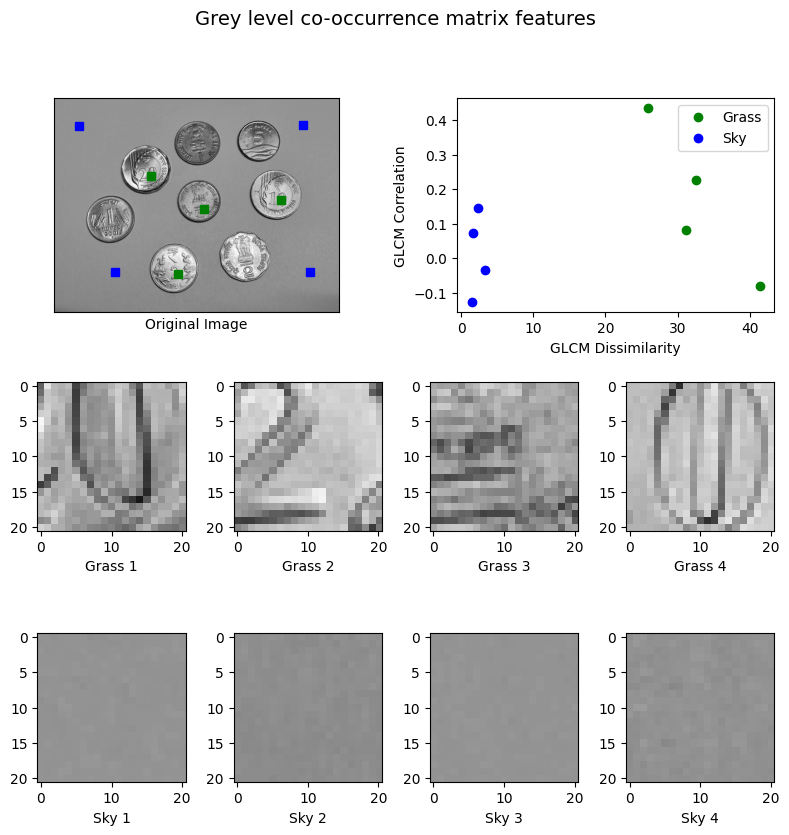

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import graycomatrix, graycoprops
from skimage import data


PATCH_SIZE = 21

# open the camera image
image = img_gray

# select some patches from grassy areas of the image
grass_locations = [(129, 165), (305, 213), (187, 260), (172, 398)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(38, 34), (300, 100), (37, 437), (300, 450)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = graycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(graycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel(f"Grass {i + 1}")

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel(f"Sky {i + 1}")


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
PATCH_SIZE = 21

image = img_gray
grass_locations = [(129, 165), (305, 213), (187, 260), (172, 398)]
sky_locations = [(38, 34), (300, 100), (37, 437), (300, 450)]


def compute_glcm_and_display_stats(patch):

    glcm = graycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    print(f"Min/max values of GLCM for the patch:")
    print(f"Min: {glcm.min()}, Max: {glcm.max()}")


# Compute GLCM for each ROI and display min/max values
for roi_type, locations in [('Grass', grass_locations), ('Sky', sky_locations)]:
    for loc in locations:
        patch = image[loc[0]:loc[0] + PATCH_SIZE, loc[1]:loc[1] + PATCH_SIZE]
        compute_glcm_and_display_stats(patch)



Min/max values of GLCM for the patch:
Min: 0.0, Max: 0.002976190476190476
Min/max values of GLCM for the patch:
Min: 0.0, Max: 0.004464285714285714
Min/max values of GLCM for the patch:
Min: 0.0, Max: 0.004464285714285714
Min/max values of GLCM for the patch:
Min: 0.0, Max: 0.004464285714285714
Min/max values of GLCM for the patch:
Min: 0.0, Max: 0.08333333333333333
Min/max values of GLCM for the patch:
Min: 0.0, Max: 0.03125
Min/max values of GLCM for the patch:
Min: 0.0, Max: 0.09523809523809523
Min/max values of GLCM for the patch:
Min: 0.0, Max: 0.020833333333333332


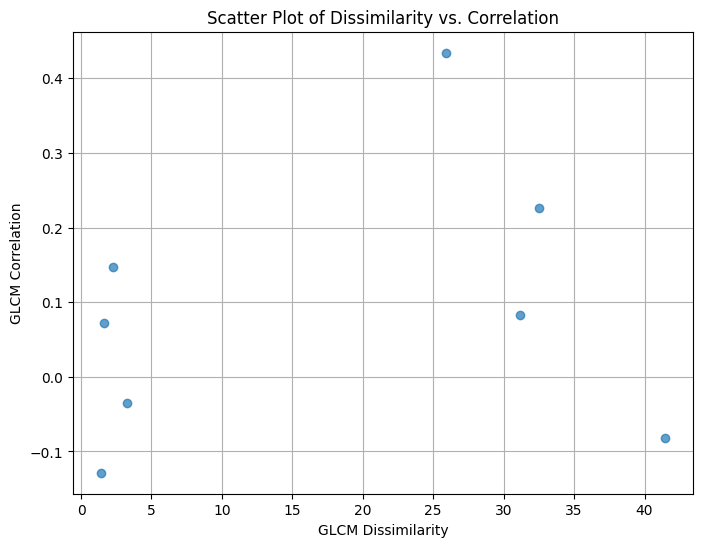

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage import data


PATCH_SIZE = 21
image = img_gray

# Select ROIs (modify these coordinates based on your image)
grass_locations = [(129, 165), (305, 213), (187, 260), (172, 398)]
sky_locations = [(38, 34), (300, 100), (37, 437), (300, 450)]

contrast_values = []
correlation_values = []


def compute_glcm_and_extract_features(patch):

    glcm = graycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)

    # Extract dissimilarity and correlation features
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    # Append features to global lists
    contrast_values.append(dissimilarity)
    correlation_values.append(correlation)


# Compute GLCM for each ROI, display stats, and extract features
for roi_type, locations in [('Grass', grass_locations), ('Sky', sky_locations)]:
    for loc in locations:
        patch = image[loc[0]:loc[0] + PATCH_SIZE, loc[1]:loc[1] + PATCH_SIZE]
        compute_glcm_and_extract_features(patch)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(contrast_values, correlation_values, alpha=0.7)

# Label axes and title
plt.xlabel('GLCM Dissimilarity')
plt.ylabel('GLCM Correlation')
plt.title('Scatter Plot of Dissimilarity vs. Correlation')

# Display the plot
plt.grid(True)
plt.show()

